Pixel RGB values:
Pixel at (0, 0) → R: 255, G: 0, B: 0
Pixel at (0, 1) → R: 0, G: 255, B: 0
Pixel at (0, 2) → R: 0, G: 0, B: 255
Pixel at (1, 0) → R: 255, G: 255, B: 0
Pixel at (1, 1) → R: 0, G: 255, B: 255
Pixel at (1, 2) → R: 255, G: 0, B: 255
Pixel at (2, 0) → R: 0, G: 0, B: 0
Pixel at (2, 1) → R: 128, G: 128, B: 128
Pixel at (2, 2) → R: 255, G: 255, B: 255


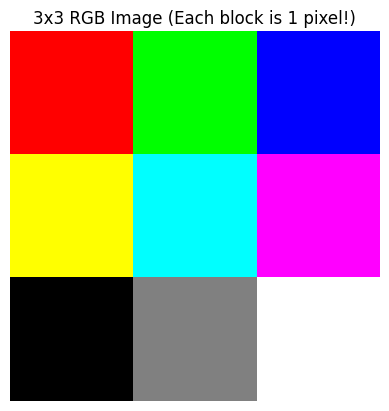

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Create a 3x3 image with 3 channels (RGB)
# Each pixel has values [R, G, B] → values range from 0 to 255
image = np.array([
    [[255, 0, 0],   [0, 255, 0],   [0, 0, 255]],     # Red, Green, Blue
    [[255, 255, 0], [0, 255, 255], [255, 0, 255]],   # Yellow, Cyan, Magenta
    [[0, 0, 0],     [128, 128, 128], [255, 255, 255]] # Black, Gray, White
], dtype=np.uint8)


print("Pixel RGB values:")
for i in range(image.shape[0]):      # Rows
    for j in range(image.shape[1]):  # Columns
        pixel = image[i, j]
        print(f"Pixel at ({i}, {j}) → R: {pixel[0]}, G: {pixel[1]}, B: {pixel[2]}")

# Show the image
plt.imshow(image)
plt.title("3x3 RGB Image (Each block is 1 pixel!)")
plt.axis('off')  # Hide axis ticks
plt.show()


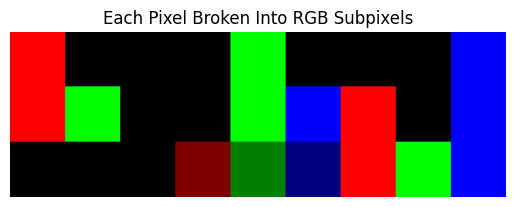

In [ ]:
# New image shape: (3 rows, 3 cols * 3 subpixels, 3 channels)
subpixel_image = np.zeros((3, 3 * 3, 3), dtype=np.uint8)

# Fill in subpixel image
for i in range(3):         # rows
    for j in range(3):     # columns
        r, g, b = image[i, j]
        subpixel_image[i, j * 3 + 0] = [r, 0, 0]   # Red subpixel
        subpixel_image[i, j * 3 + 1] = [0, g, 0]   # Green subpixel
        subpixel_image[i, j * 3 + 2] = [0, 0, b]   # Blue subpixel

zoom = 100
subpixel_zoomed = np.kron(subpixel_image, np.ones((zoom, zoom, 1), dtype=np.uint8))

# Plot
plt.imshow(subpixel_zoomed)
plt.title("Each Pixel Broken Into RGB Subpixels")
plt.axis('off')
plt.show()

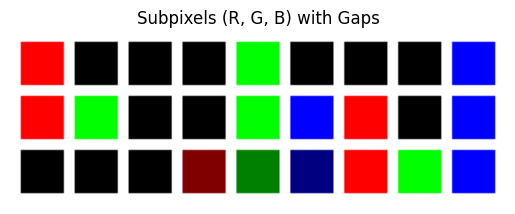

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Original 3x3 image
image = np.array([
    [[255, 0, 0],   [0, 255, 0],   [0, 0, 255]],
    [[255, 255, 0], [0, 255, 255], [255, 0, 255]],
    [[0, 0, 0],     [128, 128, 128], [255, 255, 255]]
], dtype=np.uint8)

rows, cols, _ = image.shape

# Parameters
subpixel_size = 20        # Size of each subpixel block
gap = 5                   # Gap between subpixels

# Calculate canvas size
canvas_height = rows * subpixel_size + (rows + 1) * gap
canvas_width = cols * 3 * subpixel_size + (cols * 3 + 1) * gap

# Create blank white canvas
canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255

# Draw each subpixel with spacing
for i in range(rows):      # Row
    for j in range(cols):  # Column
        r, g, b = image[i, j]

        # Positions of subpixels
        for k, color in enumerate([[r, 0, 0], [0, g, 0], [0, 0, b]]):  # R, G, B
            top = i * (subpixel_size + gap) + gap
            left = (j * 3 + k) * (subpixel_size + gap) + gap
            canvas[top:top+subpixel_size, left:left+subpixel_size] = color

# Show the result
plt.imshow(canvas)
plt.title("Subpixels (R, G, B) with Gaps")
plt.axis('off')
plt.show()


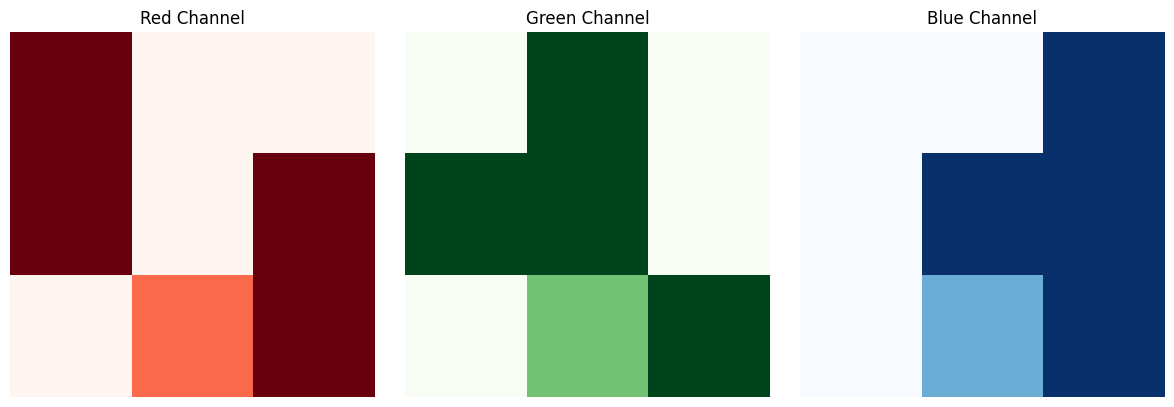

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Your original 3x3 RGB image
image = np.array([
    [[255, 0, 0],   [0, 255, 0],   [0, 0, 255]],
    [[255, 255, 0], [0, 255, 255], [255, 0, 255]],
    [[0, 0, 0],     [128, 128, 128], [255, 255, 255]]
], dtype=np.uint8)

# Split into R, G, B channels
red_channel   = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel  = image[:, :, 2]

# Plot each channel as a grayscale image
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(red_channel, cmap='Reds')
axs[0].set_title("Red Channel")
axs[0].axis('off')

axs[1].imshow(green_channel, cmap='Greens')
axs[1].set_title("Green Channel")
axs[1].axis('off')

axs[2].imshow(blue_channel, cmap='Blues')
axs[2].set_title("Blue Channel")
axs[2].axis('off')

plt.tight_layout()
plt.show()


C:\Users\sajja\AppData\Local\Temp\ipykernel_20756\332529040.py:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


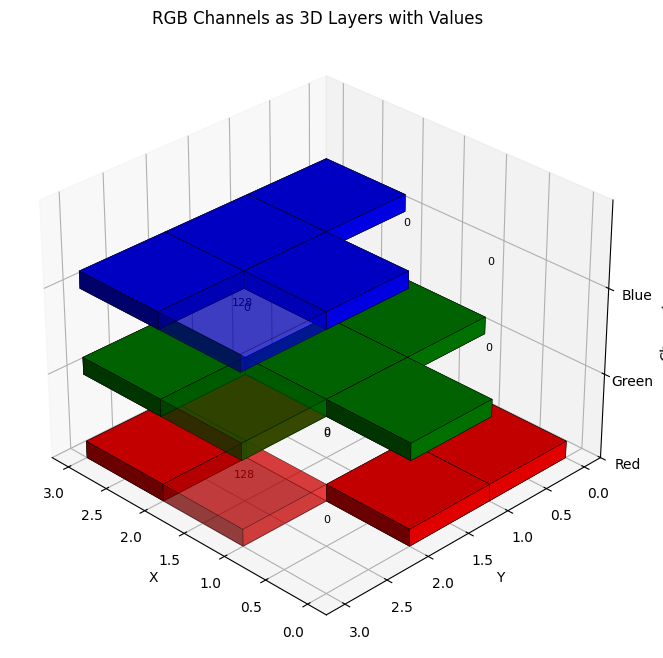

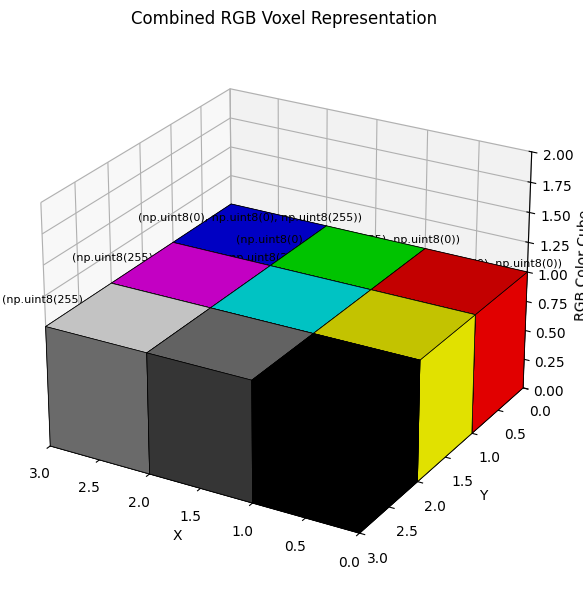

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

# Define 3x3 RGB image
image = np.array([
    [[255, 0, 0],   [0, 255, 0],   [0, 0, 255]],
    [[255, 255, 0], [0, 255, 255], [255, 0, 255]],
    [[0, 0, 0],     [128, 128, 128], [255, 255, 255]]
], dtype=np.uint8)

rows, cols = image.shape[:2]
r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]

x, y = np.meshgrid(np.arange(cols), np.arange(rows))

# --- 1. 3D RGB LAYERS with labels ---
def plot_rgb_layers(with_text=True):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=30, azim=135)

    def plot_layer(data, z_offset, color_name):
        alpha = data / 255.0
        for i in range(rows):
            for j in range(cols):
                ax.bar3d(j, i, z_offset, 1, 1, 0.2,
                         color=color_name, alpha=alpha[i, j], edgecolor='k', linewidth=0.3)
                if with_text:
                    ax.text(j + 0.5, i + 0.5, z_offset + 0.25,
                            f"{data[i, j]}", ha='center', va='bottom', fontsize=8)

    plot_layer(r, 0, 'red')
    plot_layer(g, 1, 'green')
    plot_layer(b, 2, 'blue')

    ax.set_zlim(0, 3)
    ax.set_zticks([0, 1, 2])
    ax.set_zticklabels(['Red', 'Green', 'Blue'])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Channel")
    ax.set_title("RGB Channels as 3D Layers with Values")
    plt.tight_layout()
    plt.show()

plot_rgb_layers()

# --- 2. Combined RGB Voxel Visualization ---
def plot_rgb_voxel_cube():
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=25, azim=120)

    for i in range(rows):
        for j in range(cols):
            color = image[i, j] / 255  # Normalize
            ax.bar3d(j, i, 0, 1, 1, 1,
                     color=color, edgecolor='k', linewidth=0.5)
            ax.text(j + 0.5, i + 0.5, 1.1,
                    f"{tuple(image[i, j])}", ha='center', va='bottom', fontsize=8)

    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_zlim(0, 2)
    ax.set_title("Combined RGB Voxel Representation")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("RGB Color Cube")
    plt.tight_layout()
    plt.show()

plot_rgb_voxel_cube()

# --- 3. Animation of 3D RGB Layer Rotation ---
def animate_rgb_layers():
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    def plot_layers():
        ax.clear()
        def plot_layer(data, z_offset, color_name):
            alpha = data / 255.0
            for i in range(rows):
                for j in range(cols):
                    ax.bar3d(j, i, z_offset, 1, 1, 0.2,
                             color=color_name, alpha=alpha[i, j], edgecolor='k', linewidth=0.3)

        plot_layer(r, 0, 'red')
        plot_layer(g, 1, 'green')
        plot_layer(b, 2, 'blue')
        ax.set_zlim(0, 3)
        ax.set_axis_off()

    def update(frame):
        ax.view_init(elev=30, azim=frame)
        plot_layers()

    ani = animation.FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
    plt.close(fig)
    return ani

# Create and display animation in notebook (if running in Jupyter)
ani = animate_rgb_layers()

# To save:
ani.save("rgb_rotation.gif", writer='pillow', fps=20)

# If using Jupyter, display inline:
from IPython.display import HTML
HTML(ani.to_jshtml())


In [4]:
import numpy as np
import plotly.graph_objects as go

# RGB image: 3x3, each pixel has R, G, B
image = np.array([
    [[255, 0, 0],   [0, 255, 0],   [0, 0, 255]],
    [[255, 255, 0], [0, 255, 255], [255, 0, 255]],
    [[0, 0, 0],     [128, 128, 128], [255, 255, 255]]
], dtype=np.uint8)

rows, cols = image.shape[:2]
r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]

fig = go.Figure()

# Function to draw one RGB cube (a 3D block)
def draw_cube(x, y, z, size, color):
    # 8 vertices of a cube
    x0, y0, z0 = x, y, z
    x1, y1, z1 = x + size, y + size, z + size
    vertices = np.array([
        [x0, y0, z0], [x1, y0, z0], [x1, y1, z0], [x0, y1, z0],
        [x0, y0, z1], [x1, y0, z1], [x1, y1, z1], [x0, y1, z1],
    ])
    # Triangles to form cube faces
    faces = np.array([
        [0, 1, 2], [0, 2, 3],  # bottom
        [4, 5, 6], [4, 6, 7],  # top
        [0, 1, 5], [0, 5, 4],  # front
        [1, 2, 6], [1, 6, 5],  # right
        [2, 3, 7], [2, 7, 6],  # back
        [3, 0, 4], [3, 4, 7],  # left
    ])
    x_vals, y_vals, z_vals = vertices[:, 0], vertices[:, 1], vertices[:, 2]
    i, j, k = faces[:, 0], faces[:, 1], faces[:, 2]

    fig.add_trace(go.Mesh3d(
        x=x_vals, y=y_vals, z=z_vals,
        i=i, j=j, k=k,
        color=color,
        opacity=1.0,
        flatshading=True,
        showscale=False
    ))

# Plot cubes for each R, G, B subpixel in Z-layers
for i in range(rows):
    for j in range(cols):
        if r[i, j] > 0:
            draw_cube(j, -i, 0, 0.9, f'rgb({r[i,j]},0,0)')
        if g[i, j] > 0:
            draw_cube(j, -i, 1.1, 0.9, f'rgb(0,{g[i,j]},0)')
        if b[i, j] > 0:
            draw_cube(j, -i, 2.2, 0.9, f'rgb(0,0,{b[i,j]})')

# Layout for nice 3D interaction
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Pixel X', backgroundcolor='white', showgrid=False),
        yaxis=dict(title='Pixel Y', backgroundcolor='white', showgrid=False),
        zaxis=dict(title='Channel Z', backgroundcolor='white', showgrid=False,
                   tickvals=[0, 1.1, 2.2], ticktext=['Red', 'Green', 'Blue']),
        aspectratio=dict(x=1, y=1, z=0.6),
    ),
    title="🧱 Interactive RGB Subpixels as 3D Cubes (Drag to Rotate)",
    margin=dict(l=0, r=0, t=40, b=0)
)

fig.show()


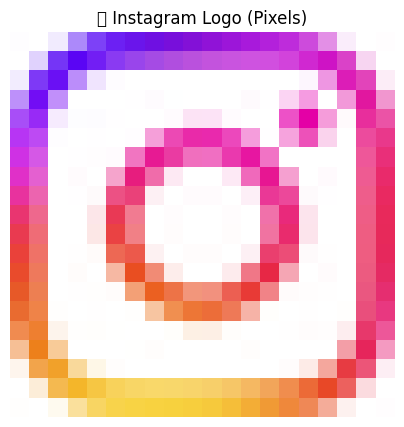

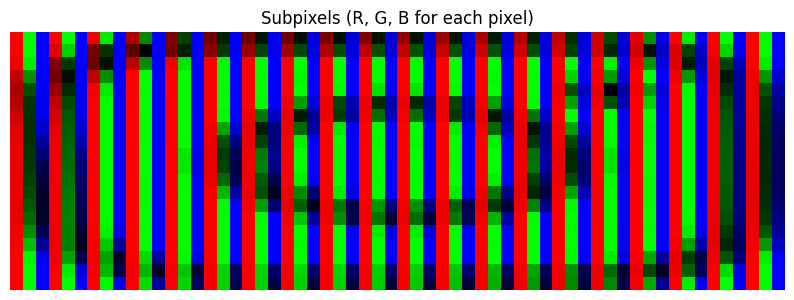

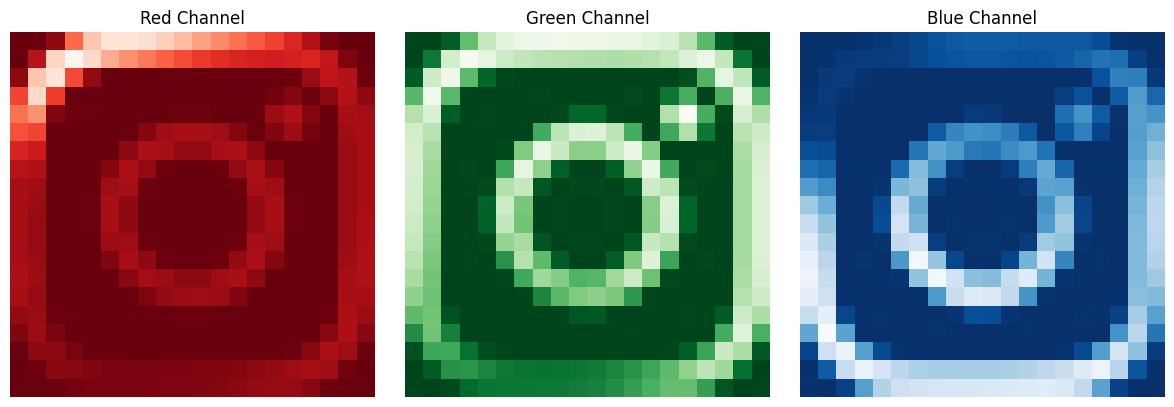

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# --- Step 1: Load and resize the image ---
image_path = "Instagram_Glyph_Gradient.png"  # Your image path
img = Image.open(image_path).convert("RGB")
img_small = img.resize((20, 20), Image.Resampling.LANCZOS)
img_array = np.array(img_small)

# --- Step 2: Visualize zoomed pixel image ---
plt.figure(figsize=(5, 5))
plt.imshow(img_array)
plt.title("🟦 Instagram Logo (Pixels)")
plt.axis('off')
plt.show()

# --- Step 3: Subpixel Visualization ---
rows, cols, _ = img_array.shape
subpixel_vis = np.zeros((rows, cols * 3, 3), dtype=np.uint8)

# Fill each section with R, G, B side-by-side
subpixel_vis[:, 0::3, 0] = img_array[:, :, 0]  # Red
subpixel_vis[:, 1::3, 1] = img_array[:, :, 1]  # Green
subpixel_vis[:, 2::3, 2] = img_array[:, :, 2]  # Blue

plt.figure(figsize=(10, 5))
plt.imshow(subpixel_vis)
plt.title("Subpixels (R, G, B for each pixel)")
plt.axis('off')
plt.show()

# --- Step 4: Visualize each channel separately ---
red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(red_channel, cmap='Reds')
axs[0].set_title("Red Channel")
axs[0].axis('off')

axs[1].imshow(green_channel, cmap='Greens')
axs[1].set_title("Green Channel")
axs[1].axis('off')

axs[2].imshow(blue_channel, cmap='Blues')
axs[2].set_title("Blue Channel")
axs[2].axis('off')

plt.tight_layout()
plt.show()


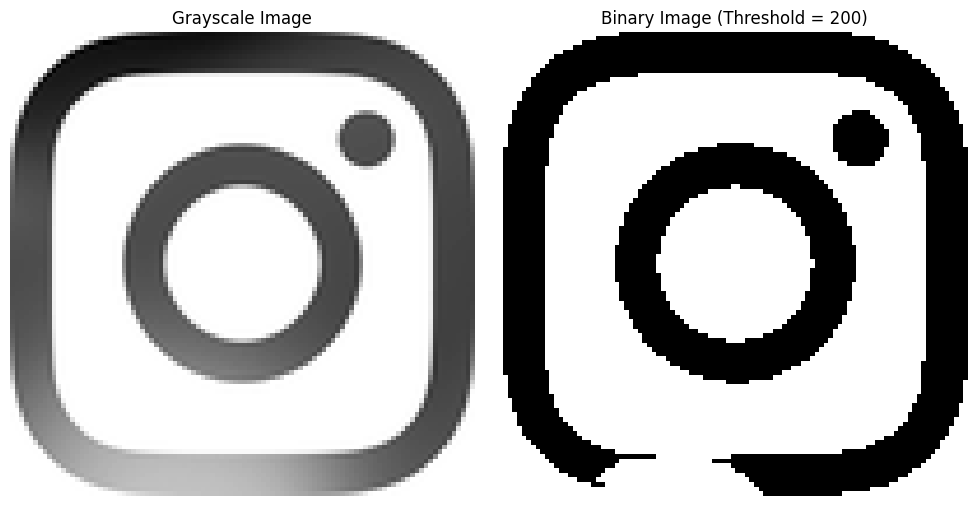

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load and convert image to grayscale
image_path = "Instagram_Glyph_Gradient.png"
img = Image.open(image_path).convert("L")  # "L" = grayscale

# Resize for simplicity
img_small = img.resize((100, 100), Image.Resampling.LANCZOS)
img_array = np.array(img_small)

# Apply threshold
threshold = 200
binary_image = np.where(img_array >= threshold, 255, 0).astype(np.uint8)

# Plot original grayscale and binary image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_array, cmap='gray')
axs[0].set_title("Grayscale Image")
axs[0].axis('off')

axs[1].imshow(binary_image, cmap='gray')
axs[1].set_title("Binary Image (Threshold = 200)")
axs[1].axis('off')

plt.tight_layout()
plt.show()


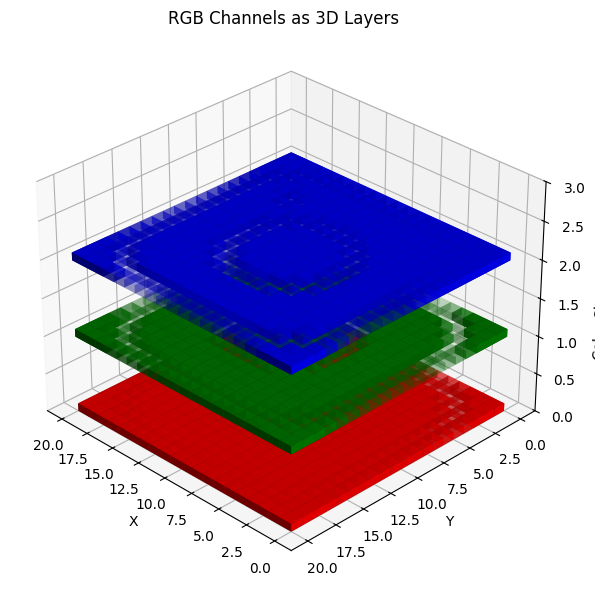

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load and resize the image
image_path = "Instagram_Glyph_Gradient.png"
img = Image.open(image_path).convert("RGB")
img = img.resize((20, 20), Image.Resampling.LANCZOS)
img_array = np.array(img)

rows, cols, _ = img_array.shape
x, y = np.meshgrid(np.arange(cols), np.arange(rows))

# Setup 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=135)

# Function to plot a color layer
def plot_layer(channel_data, z_offset, color):
    alpha = channel_data / 255.0  # Normalize for transparency
    for i in range(rows):
        for j in range(cols):
            ax.bar3d(j, i, z_offset, 1, 1, 0.1, color=color, alpha=alpha[i, j])

# Extract and plot each layer
red = img_array[:, :, 0]
green = img_array[:, :, 1]
blue = img_array[:, :, 2]

plot_layer(red, z_offset=0, color='red')
plot_layer(green, z_offset=1, color='green')
plot_layer(blue, z_offset=2, color='blue')

# Labels & limits
ax.set_zlim(0, 3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Color Channel (Z)')
ax.set_title("RGB Channels as 3D Layers")

plt.tight_layout()
plt.show()


Image Shape: 3 rows, 3 columns, 3 channels (RGB)
------------------------------
Pixel RGB values:
Pixel at (0, 0) -> R:255, G:0, B:0
Pixel at (0, 1) -> R:0, G:255, B:0
Pixel at (0, 2) -> R:0, G:0, B:255
Pixel at (1, 0) -> R:255, G:255, B:0
Pixel at (1, 1) -> R:0, G:255, B:255
Pixel at (1, 2) -> R:255, G:0, B:255
Pixel at (2, 0) -> R:0, G:0, B:0
Pixel at (2, 1) -> R:128, G:128, B:128
Pixel at (2, 2) -> R:255, G:255, B:255
------------------------------


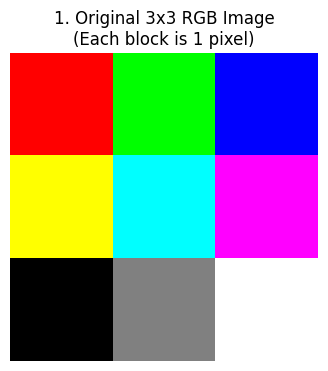

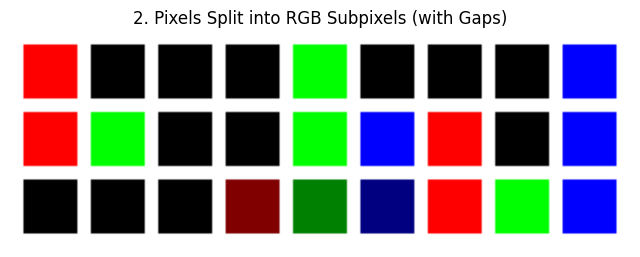

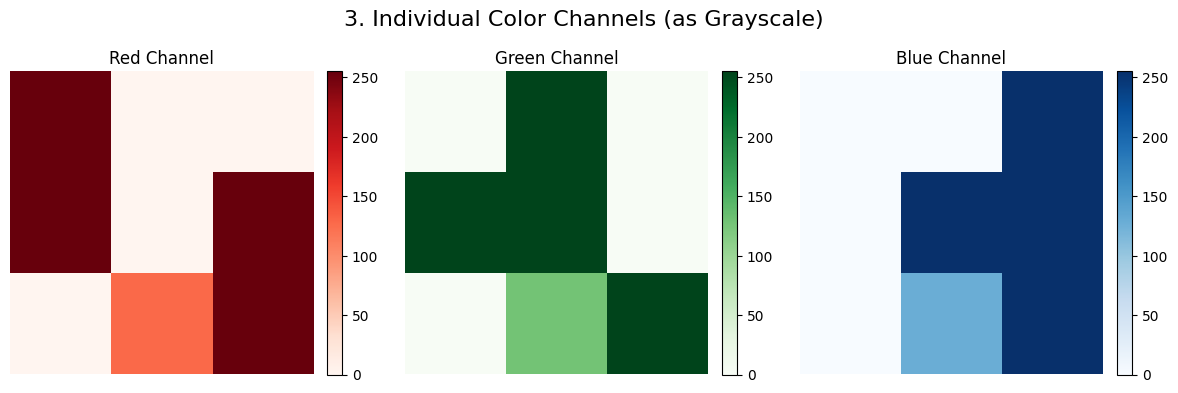

C:\Users\sajja\AppData\Local\Temp\ipykernel_20756\2666244851.py:183: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



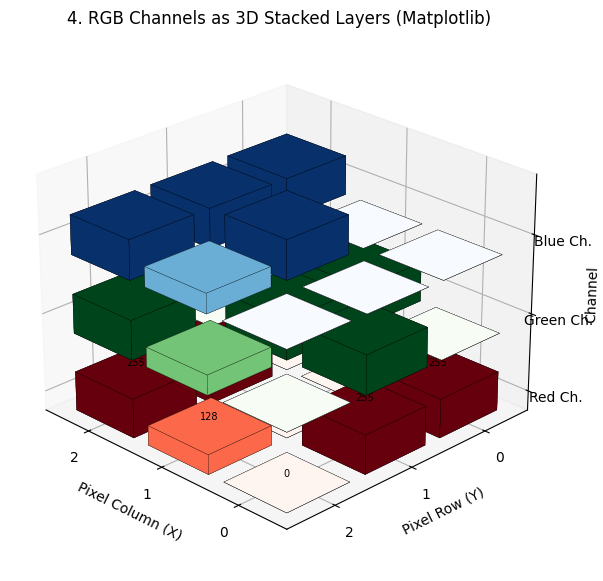

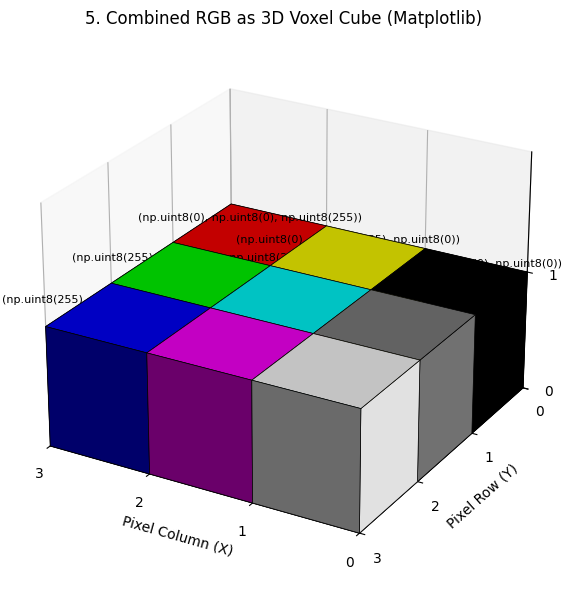


Saving animation to rgb_rotation.gif...
Animation saved successfully.
------------------------------
Generating interactive 3D plot using Plotly...


Plotly plot displayed.
------------------------------
All visualizations complete.


In [5]:
# -*- coding: utf-8 -*-
"""
Demonstrates various ways to visualize a small RGB image and its components
using Matplotlib and Plotly.

Visualizations include:
1.  Basic image display and pixel value printing.
2.  Splitting pixels into visible RGB subpixels (with gaps).
3.  Displaying individual R, G, B channels as grayscale images.
4.  3D visualization of channels as stacked layers using Matplotlib.
5.  3D visualization of pixels as colored voxels using Matplotlib.
6.  Animated 3D rotation of the stacked layers using Matplotlib.
7.  Interactive 3D visualization of channels as stacked cubes using Plotly.
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import plotly.graph_objects as go
# Required for displaying animation inline in Jupyter/IPython environments
from IPython.display import HTML

# --- Configuration ---
SAVE_ANIMATION = True # Set to True to save the rotating animation as a GIF
ANIMATION_FILENAME = "rgb_rotation.gif"
# Set to True if running in Jupyter/IPython and want to display animation inline
DISPLAY_ANIMATION_INLINE = False

# --- Core Data: Define the 3x3 RGB Image ---
# Each inner list is a pixel: [R, G, B] with values 0-255
image = np.array([
    [[255, 0, 0],   [0, 255, 0],   [0, 0, 255]],    # Top row: Red, Green, Blue
    [[255, 255, 0], [0, 255, 255], [255, 0, 255]],  # Middle row: Yellow, Cyan, Magenta
    [[0, 0, 0],     [128, 128, 128], [255, 255, 255]] # Bottom row: Black, Gray, White
], dtype=np.uint8)

rows, cols, channels = image.shape
print(f"Image Shape: {rows} rows, {cols} columns, {channels} channels (RGB)")
print("-" * 30)


# --- 1. Basic Image Display & Pixel Values ---
print("Pixel RGB values:")
for i in range(rows):
    for j in range(cols):
        pixel = image[i, j]
        print(f"Pixel at ({i}, {j}) -> R:{pixel[0]}, G:{pixel[1]}, B:{pixel[2]}")
print("-" * 30)

plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title("1. Original 3x3 RGB Image\n(Each block is 1 pixel)")
plt.axis('off') # Hide axis ticks and labels
plt.show()


# --- 2. Subpixel Visualization (with Gaps) ---
# Parameters for the subpixel visualization canvas
subpixel_size = 20      # Visual size of each R, G, or B sub-block
gap = 5                 # Gap between sub-blocks

# Calculate the total canvas size needed
canvas_height = rows * subpixel_size + (rows + 1) * gap
canvas_width = cols * 3 * subpixel_size + (cols * 3 + 1) * gap # 3 subpixels per pixel column

# Create a blank canvas (white background)
canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255

# Draw each subpixel onto the canvas
for i in range(rows):           # Iterate through image rows
    for j in range(cols):       # Iterate through image columns
        r, g, b = image[i, j]   # Get the RGB values for the current pixel

        # Define the color for each subpixel (only one channel active)
        subpixel_colors = [[r, 0, 0], [0, g, 0], [0, 0, b]] # Red, Green, Blue subpixels

        # Calculate the position and draw each subpixel block
        for k, color_val in enumerate(subpixel_colors):
            # Calculate top-left corner of the subpixel block
            top = i * (subpixel_size + gap) + gap
            left = (j * 3 + k) * (subpixel_size + gap) + gap # j*3+k maps pixel column to subpixel column

            # Assign the color to the block on the canvas
            canvas[top : top + subpixel_size, left : left + subpixel_size] = color_val

# Show the subpixel visualization
plt.figure(figsize=(8, 4))
plt.imshow(canvas)
plt.title("2. Pixels Split into RGB Subpixels (with Gaps)")
plt.axis('off')
plt.show()


# --- 3. Separate Color Channels ---
# Extract individual R, G, B channels from the image
red_channel   = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel  = image[:, :, 2]

# Create a figure with 3 subplots side-by-side
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle("3. Individual Color Channels (as Grayscale)", fontsize=16)

# Display Red channel
im_r = axs[0].imshow(red_channel, cmap='Reds', vmin=0, vmax=255)
axs[0].set_title("Red Channel")
axs[0].axis('off')
fig.colorbar(im_r, ax=axs[0], fraction=0.046, pad=0.04) # Add color bar for intensity

# Display Green channel
im_g = axs[1].imshow(green_channel, cmap='Greens', vmin=0, vmax=255)
axs[1].set_title("Green Channel")
axs[1].axis('off')
fig.colorbar(im_g, ax=axs[1], fraction=0.046, pad=0.04)

# Display Blue channel
im_b = axs[2].imshow(blue_channel, cmap='Blues', vmin=0, vmax=255)
axs[2].set_title("Blue Channel")
axs[2].axis('off')
fig.colorbar(im_b, ax=axs[2], fraction=0.046, pad=0.04)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()


# --- 4. Matplotlib 3D Visualization: Stacked Layers ---
def plot_rgb_layers_3d(img, with_text=True):
    """Plots R, G, B channels as stacked 3D layers using Matplotlib."""
    r_ch, g_ch, b_ch = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    rows_3d, cols_3d = img.shape[:2]

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    # Adjust viewing angle for better perspective
    ax.view_init(elev=25, azim=135)

    # Helper function to plot one layer
    def plot_layer(data, z_offset, color_name, cmap_name):
        alpha = data / 255.0 # Normalize for alpha blending (intensity)
        x_pos, y_pos = np.meshgrid(np.arange(cols_3d), np.arange(rows_3d))
        x_pos = x_pos.flatten()
        y_pos = y_pos.flatten()
        z_pos = np.full_like(x_pos, z_offset, dtype=float)

        dx = dy = 0.8 # Width/depth of bars
        dz = data.flatten() / 255.0 * 0.5 # Height of bars proportional to intensity

        # Get colors from colormap based on intensity
        norm = plt.Normalize(0, 255)
        cmap = plt.get_cmap(cmap_name)
        colors = cmap(norm(data.flatten()))

        ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=colors, edgecolor='k', linewidth=0.2, shade=False)

        # Add text labels with intensity values
        if with_text:
            for i in range(rows_3d):
                for j in range(cols_3d):
                     # Adjust text position slightly above the bar
                    ax.text(j + dx/2, i + dy/2, z_offset + dz.reshape(rows_3d, cols_3d)[i, j] + 0.05,
                            f"{data[i, j]}", ha='center', va='bottom', fontsize=7, color='black')

    # Plot each layer
    plot_layer(r_ch, 0, 'red', 'Reds')
    plot_layer(g_ch, 1, 'green', 'Greens')
    plot_layer(b_ch, 2, 'blue', 'Blues')

    # Configure axes
    ax.set_xticks(np.arange(cols_3d) + 0.4) # Center ticks
    ax.set_yticks(np.arange(rows_3d) + 0.4)
    ax.set_xticklabels(np.arange(cols_3d))
    ax.set_yticklabels(np.arange(rows_3d))
    ax.set_xlabel("Pixel Column (X)")
    ax.set_ylabel("Pixel Row (Y)")

    ax.set_zlim(0, 3)
    ax.set_zticks([0.25, 1.25, 2.25]) # Position ticks in the middle of layers
    ax.set_zticklabels(['Red Ch.', 'Green Ch.', 'Blue Ch.'])
    ax.set_zlabel("Channel")

    ax.set_title("4. RGB Channels as 3D Stacked Layers (Matplotlib)")
    plt.tight_layout()
    plt.show()

plot_rgb_layers_3d(image, with_text=True)


# --- 5. Matplotlib 3D Visualization: Combined Voxel Cube ---
def plot_rgb_voxel_cube_3d(img):
    """Plots the image as a 3D cube where each voxel is colored by the pixel RGB."""
    rows_vox, cols_vox = img.shape[:2]

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=25, azim=120) # Viewing angle

    # Create voxel grid - True where we want to draw a voxel
    voxels = np.ones((rows_vox, cols_vox, 1), dtype=bool) # Z-dimension is 1

    # Create color array matching the voxel grid, normalized to 0-1
    colors = img / 255.0
    # Need to reshape colors for Matplotlib's voxel plotting
    # Order needs to be (Z, Y, X) -> (1, rows, cols)
    colors_reshaped = colors.reshape(rows_vox, cols_vox, 1, 3)[::-1, :, :, :] # Flip Y for correct orientation

    # Plot the voxels
    ax.voxels(voxels, facecolors=colors_reshaped, edgecolor='k', linewidth=0.5)

    # Add RGB value text labels above each voxel
    for i in range(rows_vox):
        for j in range(cols_vox):
            ax.text(j + 0.5, i + 0.5, 1.1, # Position text above the voxel
                    f"{tuple(img[i, j])}", ha='center', va='bottom', fontsize=8, color='black')

    # Configure axes
    ax.set_xticks(np.arange(cols_vox + 1))
    ax.set_yticks(np.arange(rows_vox + 1))
    ax.set_zticks([0, 1])
    ax.set_xlabel("Pixel Column (X)")
    ax.set_ylabel("Pixel Row (Y)")
    ax.set_zlabel("Voxel")
    ax.set_title("5. Combined RGB as 3D Voxel Cube (Matplotlib)")

    # Set limits to ensure cube is framed correctly
    ax.set_xlim(0, cols_vox)
    ax.set_ylim(0, rows_vox)
    ax.set_zlim(0, 2)

    plt.tight_layout()
    plt.show()

plot_rgb_voxel_cube_3d(image)


# --- 6. Matplotlib Animation: Rotating 3D Layers ---
def animate_rgb_layers_3d(img):
    """Creates an animation of the rotating 3D stacked layers."""
    r_ch, g_ch, b_ch = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    rows_anim, cols_anim = img.shape[:2]

    fig_anim = plt.figure(figsize=(8, 6))
    ax_anim = fig_anim.add_subplot(111, projection='3d')

    # Store bar objects to update properties (optional, but good practice)
    bars_r, bars_g, bars_b = [], [], []

    def plot_layer_for_anim(ax, data, z_offset, cmap_name):
        bars = []
        alpha = data / 255.0
        x_pos, y_pos = np.meshgrid(np.arange(cols_anim), np.arange(rows_anim))
        x_pos, y_pos = x_pos.flatten(), y_pos.flatten()
        z_pos = np.full_like(x_pos, z_offset, dtype=float)
        dx = dy = 0.8
        dz = data.flatten() / 255.0 * 0.5
        norm = plt.Normalize(0, 255)
        cmap = plt.get_cmap(cmap_name)
        colors = cmap(norm(data.flatten()))

        # Add bars one by one to store them (though bar3d does it in one go)
        # bar3d returns a Poly3DCollection, not individual bars
        bar_collection = ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=colors, edgecolor='k', linewidth=0.2, shade=False)
        bars.append(bar_collection)
        return bars # Return the collection(s)

    # Initial plot setup (will be cleared in update, but sets limits etc.)
    bars_r = plot_layer_for_anim(ax_anim, r_ch, 0, 'Reds')
    bars_g = plot_layer_for_anim(ax_anim, g_ch, 1, 'Greens')
    bars_b = plot_layer_for_anim(ax_anim, b_ch, 2, 'Blues')

    ax_anim.set_xticks(np.arange(cols_anim) + 0.4)
    ax_anim.set_yticks(np.arange(rows_anim) + 0.4)
    ax_anim.set_xticklabels(np.arange(cols_anim))
    ax_anim.set_yticklabels(np.arange(rows_anim))
    ax_anim.set_zlim(0, 3)
    ax_anim.set_zticks([0.25, 1.25, 2.25])
    ax_anim.set_zticklabels(['R', 'G', 'B'])
    ax_anim.set_title("6. Rotating 3D Layers (Matplotlib Animation)")

    # Animation update function
    def update(frame):
        # Set the viewing angle (azimuth changes with frame)
        ax_anim.view_init(elev=25, azim=frame)
        return fig_anim, # Return tuple is important for FuncAnimation

    # Create the animation object
    # Frames go from 0 to 358 degrees in steps of 2
    ani = animation.FuncAnimation(fig_anim, update, frames=np.arange(0, 360, 2),
                                  interval=50, blit=False) # blit=False often needed for 3D

    # Prevent the static plot from showing now
    plt.close(fig_anim)

    return ani # Return the animation object


# --- Create and handle the animation ---
animation_object = animate_rgb_layers_3d(image)

# Option 1: Save the animation to a file
if SAVE_ANIMATION:
    try:
        print(f"\nSaving animation to {ANIMATION_FILENAME}...")
        animation_object.save(ANIMATION_FILENAME, writer='pillow', fps=20)
        print("Animation saved successfully.")
    except Exception as e:
        print(f"Error saving animation: {e}")
        print("Ensure you have 'pillow' installed (`pip install pillow`)")
print("-" * 30)

# Option 2: Display inline in Jupyter/IPython
# Note: This requires the IPython environment and might consume memory.
if DISPLAY_ANIMATION_INLINE:
    print("Displaying animation inline (requires IPython/Jupyter)...")
    display(HTML(animation_object.to_jshtml()))
    print("Inline display initiated.")
    print("-" * 30)


# --- 7. Plotly Interactive 3D Visualization: Stacked Cubes ---
def plot_interactive_rgb_cubes(img):
    """Creates an interactive 3D plot of RGB channels as cubes using Plotly."""
    r_ch, g_ch, b_ch = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    rows_plotly, cols_plotly = img.shape[:2]

    fig_plotly = go.Figure()

    # Helper function to add a single colored cube to the Plotly figure
    def draw_plotly_cube(x, y, z, size, color_rgb_str, opacity=1.0):
        # Define 8 vertices of the cube
        x0, y0, z0 = x, y, z
        x1, y1, z1 = x + size, y + size, z + size
        # Add a mesh3d trace for the cube
        fig_plotly.add_trace(go.Mesh3d(
            x=[x0, x0, x1, x1, x0, x0, x1, x1], # x coordinates of vertices
            y=[y0, y1, y1, y0, y0, y1, y1, y0], # y coordinates of vertices
            z=[z0, z0, z0, z0, z1, z1, z1, z1], # z coordinates of vertices
            i=[7, 0, 0, 0, 4, 4, 6, 6, 4, 0, 3, 2], # Indices forming triangles for faces (i)
            j=[3, 4, 1, 2, 5, 6, 5, 2, 0, 1, 2, 3], # Indices forming triangles for faces (j)
            k=[0, 7, 2, 3, 6, 7, 1, 1, 5, 5, 7, 6], # Indices forming triangles for faces (k)
            color=color_rgb_str, # Face color
            opacity=opacity,
            flatshading=True, # Gives distinct faces
            hoverinfo='none', # No hover text for the cube itself
            showscale=False   # Hide color scale
        ))

    # Plot cubes for each channel layer if the value is > 0
    cube_size = 0.8 # Size of each cube (slightly less than 1 for gaps)
    gap_z = 0.2     # Vertical gap between layers
    z_offsets = [0, 1 + gap_z, 2 + 2*gap_z] # Z positions for R, G, B layers

    for i in range(rows_plotly):
        for j in range(cols_plotly):
            # Plot Red cube if intensity > 0
            if r_ch[i, j] > 0:
                # Plotly Y often increases downwards, Matplotlib upwards. Use -i for consistency.
                draw_plotly_cube(j, -i, z_offsets[0], cube_size, f'rgb({r_ch[i,j]},0,0)')
            # Plot Green cube
            if g_ch[i, j] > 0:
                draw_plotly_cube(j, -i, z_offsets[1], cube_size, f'rgb(0,{g_ch[i,j]},0)')
            # Plot Blue cube
            if b_ch[i, j] > 0:
                 draw_plotly_cube(j, -i, z_offsets[2], cube_size, f'rgb(0,0,{b_ch[i,j]})')

    # Configure the layout of the 3D scene
    fig_plotly.update_layout(
        title="7. Interactive RGB Subpixels as 3D Cubes (Plotly - Drag to Rotate)",
        scene=dict(
            xaxis=dict(title='Pixel Column (X)', backgroundcolor='rgb(230, 230, 230)',
                       gridcolor='white', showbackground=True, zerolinecolor='white',
                       tickvals=np.arange(cols_plotly), range=[-0.5, cols_plotly - 0.5]),
            yaxis=dict(title='Pixel Row (Y)', backgroundcolor='rgb(230, 230, 230)',
                       gridcolor='white', showbackground=True, zerolinecolor='white',
                       # Adjust Y range and ticks due to using -i
                       tickvals=[-k for k in range(rows_plotly)],
                       ticktext=[str(k) for k in range(rows_plotly)],
                       range=[-rows_plotly + 0.5, 0.5]),
            zaxis=dict(title='Channel', backgroundcolor='rgb(230, 230, 230)',
                       gridcolor='white', showbackground=True, zerolinecolor='white',
                       # Set tick positions and labels for channels
                       tickvals=[z_offsets[0] + cube_size/2,
                                 z_offsets[1] + cube_size/2,
                                 z_offsets[2] + cube_size/2],
                       ticktext=['Red', 'Green', 'Blue']),
            # Set aspect ratio to make it look cubical
            aspectratio=dict(x=1, y=1, z=0.8),
            # Set initial camera view
            camera=dict(
                eye=dict(x=1.5, y=-1.5, z=1.2) # Adjust eye position for a good starting view
            )
        ),
        margin=dict(l=10, r=10, t=50, b=10) # Adjust margins
    )

    fig_plotly.show()

print("Generating interactive 3D plot using Plotly...")
plot_interactive_rgb_cubes(image)
print("Plotly plot displayed.")
print("-" * 30)
print("All visualizations complete.")

Pixel RGB values:
Pixel at (0, 0) → R: 255, G: 0, B: 0
Pixel at (0, 1) → R: 0, G: 255, B: 0
Pixel at (0, 2) → R: 0, G: 0, B: 255
Pixel at (1, 0) → R: 255, G: 255, B: 0
Pixel at (1, 1) → R: 0, G: 255, B: 255
Pixel at (1, 2) → R: 255, G: 0, B: 255
Pixel at (2, 0) → R: 0, G: 0, B: 0
Pixel at (2, 1) → R: 128, G: 128, B: 128
Pixel at (2, 2) → R: 255, G: 255, B: 255


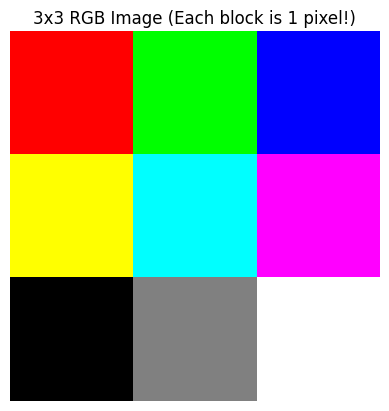

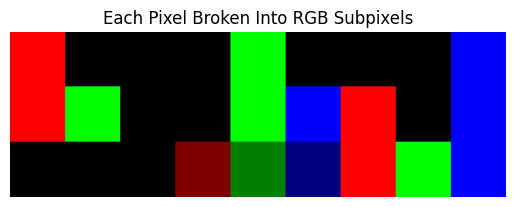

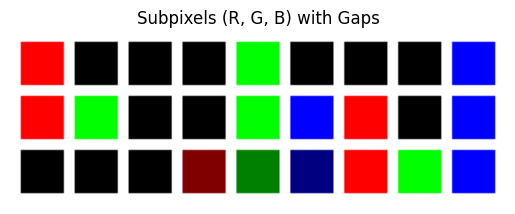

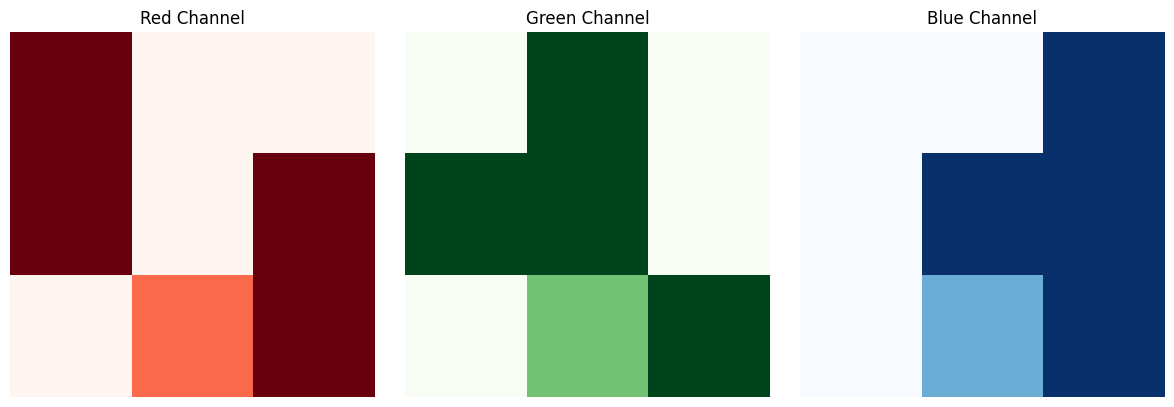

C:\Users\sajja\AppData\Local\Temp\ipykernel_20756\135109826.py:122: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



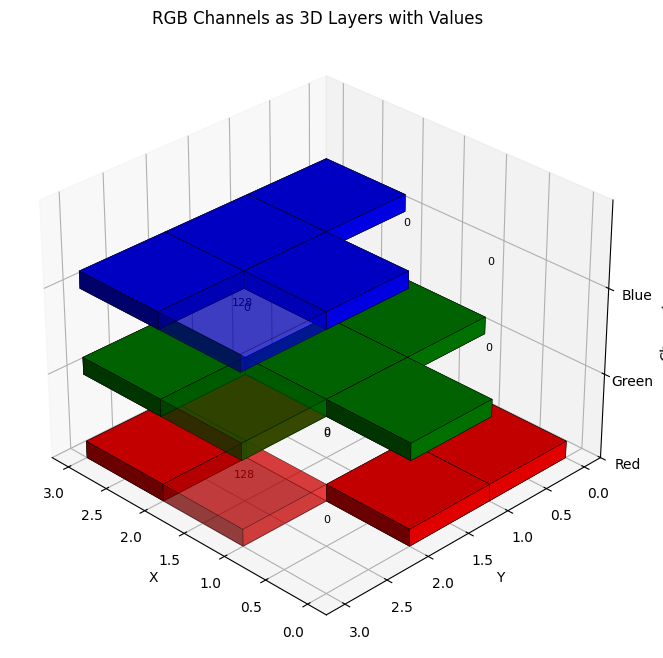

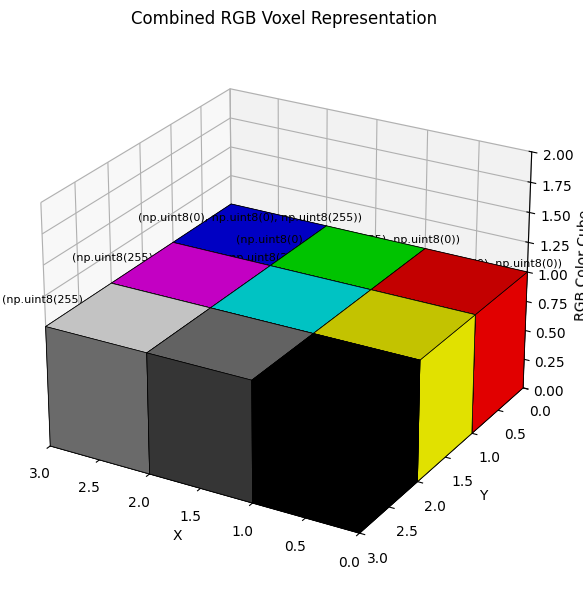

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML
import plotly.graph_objects as go

# -----------------------------
# 1. Define the 3x3 RGB Image
# -----------------------------
image = np.array([
    [[255, 0, 0],   [0, 255, 0],   [0, 0, 255]],
    [[255, 255, 0], [0, 255, 255], [255, 0, 255]],
    [[0, 0, 0],     [128, 128, 128], [255, 255, 255]]
], dtype=np.uint8)

# -----------------------------
# 2. Print Pixel RGB Values
# -----------------------------
print("Pixel RGB values:")
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        pixel = image[i, j]
        print(f"Pixel at ({i}, {j}) → R: {pixel[0]}, G: {pixel[1]}, B: {pixel[2]}")

# -----------------------------
# 3. Show the Original Image
# -----------------------------
plt.imshow(image)
plt.title("3x3 RGB Image (Each block is 1 pixel!)")
plt.axis('off')
plt.show()

# -----------------------------
# 4. Visualize Subpixels Linearly
# -----------------------------
subpixel_image = np.zeros((3, 3 * 3, 3), dtype=np.uint8)
for i in range(3):
    for j in range(3):
        r, g, b = image[i, j]
        subpixel_image[i, j * 3 + 0] = [r, 0, 0]
        subpixel_image[i, j * 3 + 1] = [0, g, 0]
        subpixel_image[i, j * 3 + 2] = [0, 0, b]

zoom = 100
subpixel_zoomed = np.kron(subpixel_image, np.ones((zoom, zoom, 1), dtype=np.uint8))
plt.imshow(subpixel_zoomed)
plt.title("Each Pixel Broken Into RGB Subpixels")
plt.axis('off')
plt.show()

# -----------------------------
# 5. Subpixels with Gaps
# -----------------------------
subpixel_size = 20
gap = 5
rows, cols, _ = image.shape
canvas_height = rows * subpixel_size + (rows + 1) * gap
canvas_width = cols * 3 * subpixel_size + (cols * 3 + 1) * gap
canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255

for i in range(rows):
    for j in range(cols):
        r, g, b = image[i, j]
        for k, color in enumerate([[r, 0, 0], [0, g, 0], [0, 0, b]]):
            top = i * (subpixel_size + gap) + gap
            left = (j * 3 + k) * (subpixel_size + gap) + gap
            canvas[top:top+subpixel_size, left:left+subpixel_size] = color

plt.imshow(canvas)
plt.title("Subpixels (R, G, B) with Gaps")
plt.axis('off')
plt.show()

# -----------------------------
# 6. RGB Channels Individually
# -----------------------------
red_channel   = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel  = image[:, :, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(red_channel, cmap='Reds')
axs[0].set_title("Red Channel")
axs[0].axis('off')
axs[1].imshow(green_channel, cmap='Greens')
axs[1].set_title("Green Channel")
axs[1].axis('off')
axs[2].imshow(blue_channel, cmap='Blues')
axs[2].set_title("Blue Channel")
axs[2].axis('off')
plt.tight_layout()
plt.show()

# -----------------------------
# 7. 3D Layer Visualization
# -----------------------------
def plot_rgb_layers(with_text=True):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=30, azim=135)

    def plot_layer(data, z_offset, color_name):
        alpha = data / 255.0
        for i in range(rows):
            for j in range(cols):
                ax.bar3d(j, i, z_offset, 1, 1, 0.2, color=color_name, alpha=alpha[i, j], edgecolor='k', linewidth=0.3)
                if with_text:
                    ax.text(j + 0.5, i + 0.5, z_offset + 0.25, f"{data[i, j]}", ha='center', va='bottom', fontsize=8)

    plot_layer(red_channel, 0, 'red')
    plot_layer(green_channel, 1, 'green')
    plot_layer(blue_channel, 2, 'blue')

    ax.set_zlim(0, 3)
    ax.set_zticks([0, 1, 2])
    ax.set_zticklabels(['Red', 'Green', 'Blue'])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Channel")
    ax.set_title("RGB Channels as 3D Layers with Values")
    plt.tight_layout()
    plt.show()

plot_rgb_layers()

# -----------------------------
# 8. RGB Voxel Cube
# -----------------------------
def plot_rgb_voxel_cube():
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=25, azim=120)

    for i in range(rows):
        for j in range(cols):
            color = image[i, j] / 255
            ax.bar3d(j, i, 0, 1, 1, 1, color=color, edgecolor='k', linewidth=0.5)
            ax.text(j + 0.5, i + 0.5, 1.1, f"{tuple(image[i, j])}", ha='center', va='bottom', fontsize=8)

    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_zlim(0, 2)
    ax.set_title("Combined RGB Voxel Representation")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("RGB Color Cube")
    plt.tight_layout()
    plt.show()

plot_rgb_voxel_cube()

# -----------------------------
# 9. Animation of 3D Layers
# -----------------------------
def animate_rgb_layers():
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    def plot_layers():
        ax.clear()
        for data, z_offset, color_name in zip([red_channel, green_channel, blue_channel], [0, 1, 2], ['red', 'green', 'blue']):
            alpha = data / 255.0
            for i in range(rows):
                for j in range(cols):
                    ax.bar3d(j, i, z_offset, 1, 1, 0.2, color=color_name, alpha=alpha[i, j], edgecolor='k', linewidth=0.3)
        ax.set_zlim(0, 3)
        ax.set_axis_off()

    def update(frame):
        ax.view_init(elev=30, azim=frame)
        plot_layers()

    ani = animation.FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
    plt.close(fig)
    return ani

ani = animate_rgb_layers()
ani.save("rgb_rotation.gif", writer='pillow', fps=20)
HTML(ani.to_jshtml())

# -----------------------------
# 10. Plotly Interactive Cubes
# -----------------------------
fig = go.Figure()

def draw_cube(x, y, z, size, color):
    x0, y0, z0 = x, y, z
    x1, y1, z1 = x + size, y + size, z + size
    vertices = np.array([
        [x0, y0, z0], [x1, y0, z0], [x1, y1, z0], [x0, y1, z0],
        [x0, y0, z1], [x1, y0, z1], [x1, y1, z1], [x0, y1, z1],
    ])
    faces = np.array([
        [0, 1, 2], [0, 2, 3],
        [4, 5, 6], [4, 6, 7],
        [0, 1, 5], [0, 5, 4],
        [1, 2, 6], [1, 6, 5],
        [2, 3, 7], [2, 7, 6],
        [3, 0, 4], [3, 4, 7],
    ])
    x_vals, y_vals, z_vals = vertices[:, 0], vertices[:, 1], vertices[:, 2]
    i, j, k = faces[:, 0], faces[:, 1], faces[:, 2]

    fig.add_trace(go.Mesh3d(
        x=x_vals, y=y_vals, z=z_vals,
        i=i, j=j, k=k,
        color=color,
        opacity=1.0,
        flatshading=True,
        showscale=False
    ))

for i in range(rows):
    for j in range(cols):
        if red_channel[i, j] > 0:
            draw_cube(j, -i, 0, 0.9, f'rgb({red_channel[i,j]},0,0)')
        if green_channel[i, j] > 0:
            draw_cube(j, -i, 1.1, 0.9, f'rgb(0,{green_channel[i,j]},0)')
        if blue_channel[i, j] > 0:
            draw_cube(j, -i, 2.2, 0.9, f'rgb(0,0,{blue_channel[i,j]})')

fig.update_layout(
    scene=dict(
        xaxis=dict(title='Pixel X', backgroundcolor='white', showgrid=False),
        yaxis=dict(title='Pixel Y', backgroundcolor='white', showgrid=False),
        zaxis=dict(title='Channel Z', backgroundcolor='white', showgrid=False,
                   tickvals=[0, 1.1, 2.2], ticktext=['Red', 'Green', 'Blue']),
        aspectratio=dict(x=1, y=1, z=0.6),
    ),
    title="🧱 Interactive RGB Subpixels as 3D Cubes (Drag to Rotate)",
    margin=dict(l=0, r=0, t=40, b=0)
)
fig.show()


1. Pixel RGB values:
Pixel at (0, 0) → R: 255, G: 0, B: 0
Pixel at (0, 1) → R: 0, G: 255, B: 0
Pixel at (0, 2) → R: 0, G: 0, B: 255
Pixel at (1, 0) → R: 255, G: 255, B: 0
Pixel at (1, 1) → R: 0, G: 255, B: 255
Pixel at (1, 2) → R: 255, G: 0, B: 255
Pixel at (2, 0) → R: 0, G: 0, B: 0
Pixel at (2, 1) → R: 128, G: 128, B: 128
Pixel at (2, 2) → R: 255, G: 255, B: 255
2. Original Image


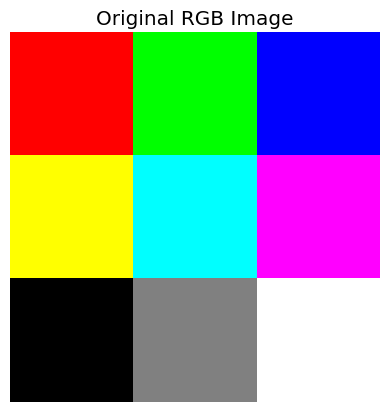

3. Subpixels Linearly


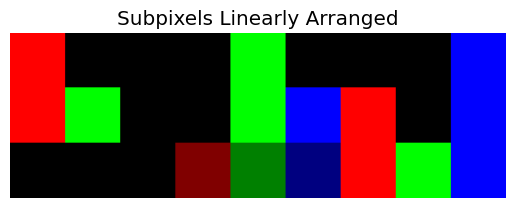

4. Subpixels with Gaps


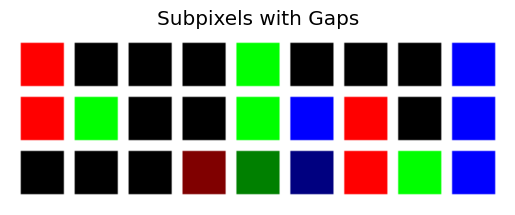

5. Individual Channels


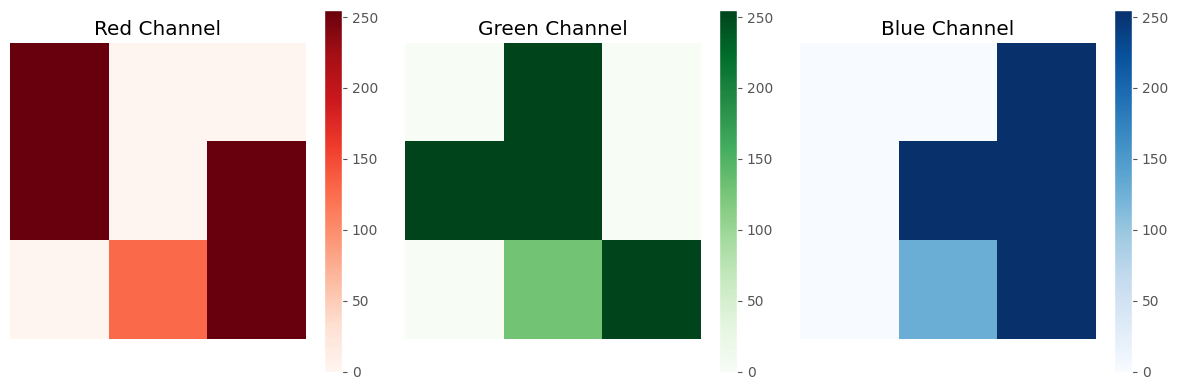

6. 3D Layer Visualization


C:\Users\sajja\AppData\Local\Temp\ipykernel_20756\2367297788.py:96: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



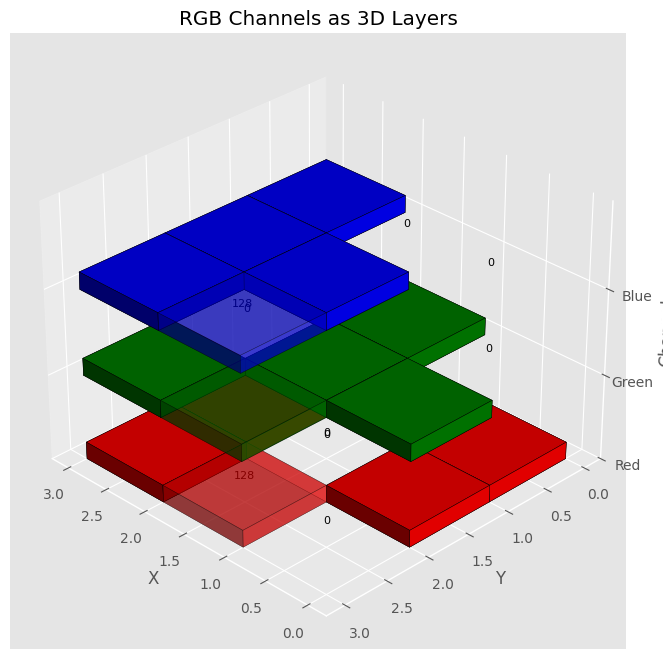

7. RGB Voxel Cube


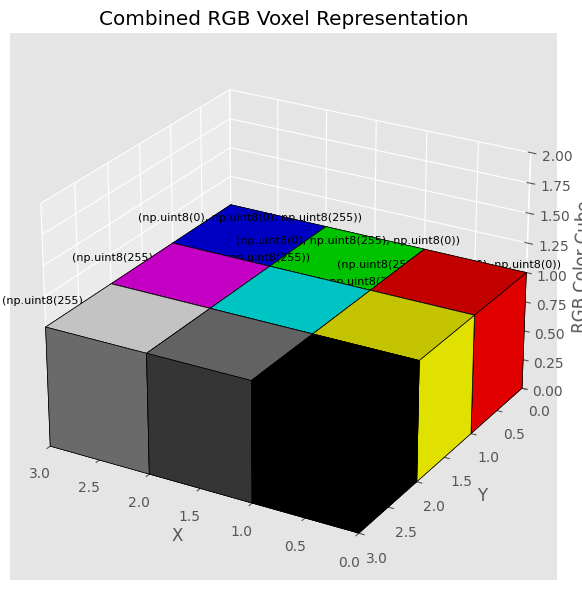

8. Animation of 3D Layers
9. Plotly Interactive Cubes


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML
import plotly.graph_objects as go

def print_pixel_values(image):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image[i, j]
            print(f"Pixel at ({i}, {j}) → R: {pixel[0]}, G: {pixel[1]}, B: {pixel[2]}")

def display_original_image(image):
    plt.imshow(image)
    plt.title("Original RGB Image")
    plt.axis('off')
    plt.show()

def visualize_subpixels_linear(image, zoom=100):
    subpixel_image = np.zeros((image.shape[0], image.shape[1] * 3, 3), dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            r, g, b = image[i, j]
            subpixel_image[i, j * 3 + 0] = [r, 0, 0]
            subpixel_image[i, j * 3 + 1] = [0, g, 0]
            subpixel_image[i, j * 3 + 2] = [0, 0, b]
    subpixel_zoomed = np.kron(subpixel_image, np.ones((zoom, zoom, 1), dtype=np.uint8))
    plt.imshow(subpixel_zoomed)
    plt.title("Subpixels Linearly Arranged")
    plt.axis('off')
    plt.show()

def visualize_subpixels_with_gaps(image, subpixel_size=20, gap=5):
    rows, cols, _ = image.shape
    canvas_height = rows * subpixel_size + (rows + 1) * gap
    canvas_width = cols * 3 * subpixel_size + (cols * 3 + 1) * gap
    canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255
    for i in range(rows):
        for j in range(cols):
            r, g, b = image[i, j]
            for k, color in enumerate([[r, 0, 0], [0, g, 0], [0, 0, b]]):
                top = i * (subpixel_size + gap) + gap
                left = (j * 3 + k) * (subpixel_size + gap) + gap
                canvas[top:top+subpixel_size, left:left+subpixel_size] = color
    plt.imshow(canvas)
    plt.title("Subpixels with Gaps")
    plt.axis('off')
    plt.show()

def display_channels(image):
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    im0 = axs[0].imshow(red_channel, cmap='Reds')
    axs[0].set_title("Red Channel")
    axs[0].axis('off')
    plt.colorbar(im0, ax=axs[0])
    im1 = axs[1].imshow(green_channel, cmap='Greens')
    axs[1].set_title("Green Channel")
    axs[1].axis('off')
    plt.colorbar(im1, ax=axs[1])
    im2 = axs[2].imshow(blue_channel, cmap='Blues')
    axs[2].set_title("Blue Channel")
    axs[2].axis('off')
    plt.colorbar(im2, ax=axs[2])
    plt.tight_layout()
    plt.show()

def plot_rgb_layers(image, with_text=True):
    rows, cols = image.shape[:2]
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=30, azim=135)
    def plot_layer(data, z_offset, color_name):
        alpha = data / 255.0
        for i in range(rows):
            for j in range(cols):
                ax.bar3d(j, i, z_offset, 1, 1, 0.2, color=color_name, alpha=alpha[i, j], edgecolor='k', linewidth=0.3)
                if with_text:
                    ax.text(j + 0.5, i + 0.5, z_offset + 0.25, f"{data[i, j]}", ha='center', va='bottom', fontsize=8)
    plot_layer(red_channel, 0, 'red')
    plot_layer(green_channel, 1, 'green')
    plot_layer(blue_channel, 2, 'blue')
    ax.set_zlim(0, 3)
    ax.set_zticks([0, 1, 2])
    ax.set_zticklabels(['Red', 'Green', 'Blue'])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Channel")
    ax.set_title("RGB Channels as 3D Layers")
    plt.tight_layout()
    plt.show()

def plot_rgb_voxel_cube(image):
    rows, cols = image.shape[:2]
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=25, azim=120)
    for i in range(rows):
        for j in range(cols):
            color = image[i, j] / 255
            ax.bar3d(j, i, 0, 1, 1, 1, color=color, edgecolor='k', linewidth=0.5)
            ax.text(j + 0.5, i + 0.5, 1.1, f"{tuple(image[i, j])}", ha='center', va='bottom', fontsize=8)
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_zlim(0, 2)
    ax.set_title("Combined RGB Voxel Representation")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("RGB Color Cube")
    plt.tight_layout()
    plt.show()

def animate_rgb_layers(image):
    rows, cols = image.shape[:2]
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    def plot_layers():
        ax.clear()
        for data, z_offset, color_name in zip([red_channel, green_channel, blue_channel], [0, 1, 2], ['red', 'green', 'blue']):
            alpha = data / 255.0
            for i in range(rows):
                for j in range(cols):
                    ax.bar3d(j, i, z_offset, 1, 1, 0.2, color=color_name, alpha=alpha[i, j], edgecolor='k', linewidth=0.3)
        ax.set_zlim(0, 3)
        ax.set_zticks([0, 1, 2])
        ax.set_zticklabels(['Red', 'Green', 'Blue'])
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Channel")
    def update(frame):
        ax.view_init(elev=30, azim=frame)
        plot_layers()
    ani = animation.FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
    plt.close(fig)
    return ani

def plot_interactive_cubes(image):
    fig = go.Figure()
    rows, cols = image.shape[:2]
    def draw_cube(x, y, z, size, color):
        x0, y0, z0 = x, y, z
        x1, y1, z1 = x + size, y + size, z + size
        vertices = np.array([
            [x0, y0, z0], [x1, y0, z0], [x1, y1, z0], [x0, y1, z0],
            [x0, y0, z1], [x1, y0, z1], [x1, y1, z1], [x0, y1, z1],
        ])
        faces = np.array([
            [0, 1, 2], [0, 2, 3],
            [4, 5, 6], [4, 6, 7],
            [0, 1, 5], [0, 5, 4],
            [1, 2, 6], [1, 6, 5],
            [2, 3, 7], [2, 7, 6],
            [3, 0, 4], [3, 4, 7],
        ])
        x_vals, y_vals, z_vals = vertices[:, 0], vertices[:, 1], vertices[:, 2]
        i, j, k = faces[:, 0], faces[:, 1], faces[:, 2]
        fig.add_trace(go.Mesh3d(
            x=x_vals, y=y_vals, z=z_vals,
            i=i, j=j, k=k,
            color=color,
            opacity=1.0,
            flatshading=True,
            showscale=False
        ))
    for i in range(rows):
        for j in range(cols):
            r, g, b = image[i, j]
            if r > 0:
                draw_cube(j, -i, 0, 0.9, f'rgb({r},0,0)')
            if g > 0:
                draw_cube(j, -i, 1.1, 0.9, f'rgb(0,{g},0)')
            if b > 0:
                draw_cube(j, -i, 2.2, 0.9, f'rgb(0,0,{b})')
    fig.update_layout(
        scene=dict(
            xaxis=dict(title='Pixel X', backgroundcolor='white', showgrid=False),
            yaxis=dict(title='Pixel Y', backgroundcolor='white', showgrid=False),
            zaxis=dict(title='Channel Z', backgroundcolor='white', showgrid=False,
                       tickvals=[0, 1.1, 2.2], ticktext=['Red', 'Green', 'Blue']),
            aspectratio=dict(x=1, y=1, z=0.6),
        ),
        title="Interactive RGB Subpixels as 3D Cubes",
        margin=dict(l=0, r=0, t=40, b=0)
    )
    fig.show()

# Example usage
if __name__ == "__main__":
    image = np.array([
        [[255, 0, 0], [0, 255, 0], [0, 0, 255]],
        [[255, 255, 0], [0, 255, 255], [255, 0, 255]],
        [[0, 0, 0], [128, 128, 128], [255, 255, 255]]
    ], dtype=np.uint8)

    print("1. Pixel RGB values:")
    print_pixel_values(image)

    print("2. Original Image")
    display_original_image(image)

    print("3. Subpixels Linearly")
    visualize_subpixels_linear(image)

    print("4. Subpixels with Gaps")
    visualize_subpixels_with_gaps(image)

    print("5. Individual Channels")
    display_channels(image)

    print("6. 3D Layer Visualization")
    plot_rgb_layers(image)

    print("7. RGB Voxel Cube")
    plot_rgb_voxel_cube(image)

    print("8. Animation of 3D Layers")
    ani = animate_rgb_layers(image)
    HTML(ani.to_jshtml())

    print("9. Plotly Interactive Cubes")
    plot_interactive_cubes(image)

Pixel RGB values:
Pixel at (0, 0) → R: 255, G: 0, B: 0
Pixel at (0, 1) → R: 0, G: 255, B: 0
Pixel at (0, 2) → R: 0, G: 0, B: 255
Pixel at (1, 0) → R: 255, G: 255, B: 0
Pixel at (1, 1) → R: 0, G: 255, B: 255
Pixel at (1, 2) → R: 255, G: 0, B: 255
Pixel at (2, 0) → R: 0, G: 0, B: 0
Pixel at (2, 1) → R: 128, G: 128, B: 128
Pixel at (2, 2) → R: 255, G: 255, B: 255


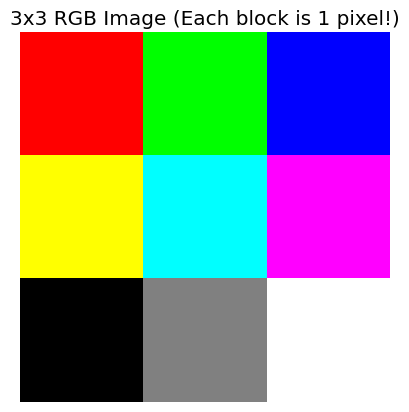

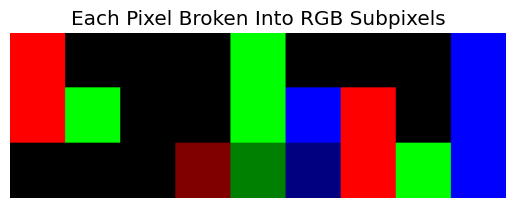

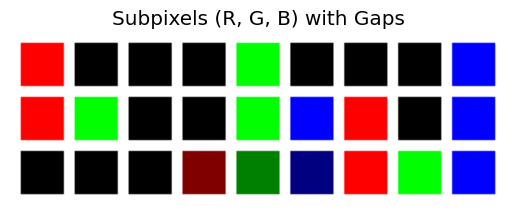

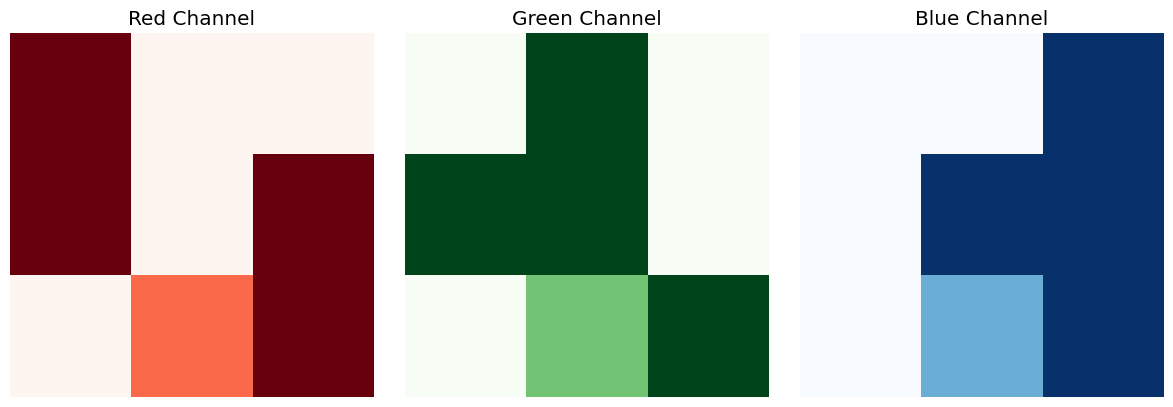

C:\Users\sajja\AppData\Local\Temp\ipykernel_20756\1148877547.py:122: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



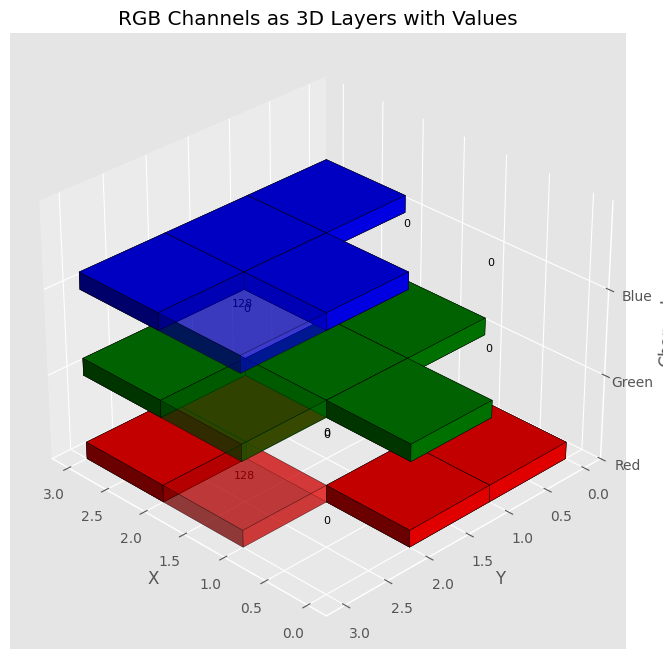

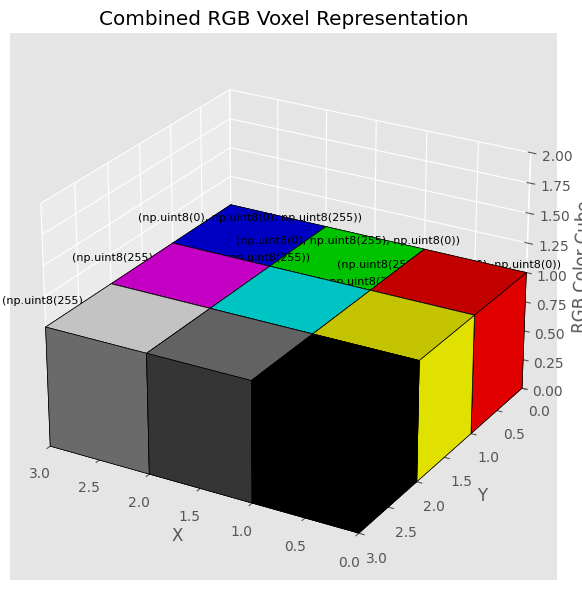

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML
import plotly.graph_objects as go

# -----------------------------
# 1. Define the 3x3 RGB Image
# -----------------------------
image = np.array([
    [[255, 0, 0],   [0, 255, 0],   [0, 0, 255]],
    [[255, 255, 0], [0, 255, 255], [255, 0, 255]],
    [[0, 0, 0],     [128, 128, 128], [255, 255, 255]]
], dtype=np.uint8)

# -----------------------------
# 2. Print Pixel RGB Values
# -----------------------------
print("Pixel RGB values:")
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        pixel = image[i, j]
        print(f"Pixel at ({i}, {j}) → R: {pixel[0]}, G: {pixel[1]}, B: {pixel[2]}")

# -----------------------------
# 3. Show the Original Image
# -----------------------------
plt.imshow(image)
plt.title("3x3 RGB Image (Each block is 1 pixel!)")
plt.axis('off')
plt.show()

# -----------------------------
# 4. Visualize Subpixels Linearly
# -----------------------------
subpixel_image = np.zeros((3, 3 * 3, 3), dtype=np.uint8)
for i in range(3):
    for j in range(3):
        r, g, b = image[i, j]
        subpixel_image[i, j * 3 + 0] = [r, 0, 0]
        subpixel_image[i, j * 3 + 1] = [0, g, 0]
        subpixel_image[i, j * 3 + 2] = [0, 0, b]

zoom = 100
subpixel_zoomed = np.kron(subpixel_image, np.ones((zoom, zoom, 1), dtype=np.uint8))
plt.imshow(subpixel_zoomed)
plt.title("Each Pixel Broken Into RGB Subpixels")
plt.axis('off')
plt.show()

# -----------------------------
# 5. Subpixels with Gaps
# -----------------------------
subpixel_size = 20
gap = 5
rows, cols, _ = image.shape
canvas_height = rows * subpixel_size + (rows + 1) * gap
canvas_width = cols * 3 * subpixel_size + (cols * 3 + 1) * gap
canvas = np.ones((canvas_height, canvas_width, 3), dtype=np.uint8) * 255

for i in range(rows):
    for j in range(cols):
        r, g, b = image[i, j]
        for k, color in enumerate([[r, 0, 0], [0, g, 0], [0, 0, b]]):
            top = i * (subpixel_size + gap) + gap
            left = (j * 3 + k) * (subpixel_size + gap) + gap
            canvas[top:top+subpixel_size, left:left+subpixel_size] = color

plt.imshow(canvas)
plt.title("Subpixels (R, G, B) with Gaps")
plt.axis('off')
plt.show()

# -----------------------------
# 6. RGB Channels Individually
# -----------------------------
red_channel   = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel  = image[:, :, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(red_channel, cmap='Reds')
axs[0].set_title("Red Channel")
axs[0].axis('off')
axs[1].imshow(green_channel, cmap='Greens')
axs[1].set_title("Green Channel")
axs[1].axis('off')
axs[2].imshow(blue_channel, cmap='Blues')
axs[2].set_title("Blue Channel")
axs[2].axis('off')
plt.tight_layout()
plt.show()

# -----------------------------
# 7. 3D Layer Visualization
# -----------------------------
def plot_rgb_layers(with_text=True):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=30, azim=135)

    def plot_layer(data, z_offset, color_name):
        alpha = data / 255.0
        for i in range(rows):
            for j in range(cols):
                ax.bar3d(j, i, z_offset, 1, 1, 0.2, color=color_name, alpha=alpha[i, j], edgecolor='k', linewidth=0.3)
                if with_text:
                    ax.text(j + 0.5, i + 0.5, z_offset + 0.25, f"{data[i, j]}", ha='center', va='bottom', fontsize=8)

    plot_layer(red_channel, 0, 'red')
    plot_layer(green_channel, 1, 'green')
    plot_layer(blue_channel, 2, 'blue')

    ax.set_zlim(0, 3)
    ax.set_zticks([0, 1, 2])
    ax.set_zticklabels(['Red', 'Green', 'Blue'])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Channel")
    ax.set_title("RGB Channels as 3D Layers with Values")
    plt.tight_layout()
    plt.show()

plot_rgb_layers()

# -----------------------------
# 8. RGB Voxel Cube
# -----------------------------
def plot_rgb_voxel_cube():
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=25, azim=120)

    for i in range(rows):
        for j in range(cols):
            color = image[i, j] / 255
            ax.bar3d(j, i, 0, 1, 1, 1, color=color, edgecolor='k', linewidth=0.5)
            ax.text(j + 0.5, i + 0.5, 1.1, f"{tuple(image[i, j])}", ha='center', va='bottom', fontsize=8)

    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_zlim(0, 2)
    ax.set_title("Combined RGB Voxel Representation")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("RGB Color Cube")
    plt.tight_layout()
    plt.show()

plot_rgb_voxel_cube()

# -----------------------------
# 9. Animation of 3D Layers
# -----------------------------
def animate_rgb_layers():
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    def plot_layers():
        ax.clear()
        for data, z_offset, color_name in zip([red_channel, green_channel, blue_channel], [0, 1, 2], ['red', 'green', 'blue']):
            alpha = data / 255.0
            for i in range(rows):
                for j in range(cols):
                    ax.bar3d(j, i, z_offset, 1, 1, 0.2, color=color_name, alpha=alpha[i, j], edgecolor='k', linewidth=0.3)
        ax.set_zlim(0, 3)
        ax.set_axis_off()

    def update(frame):
        ax.view_init(elev=30, azim=frame)
        plot_layers()

    ani = animation.FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)
    plt.close(fig)
    return ani

ani = animate_rgb_layers()
ani.save("rgb_rotation.gif", writer='pillow', fps=20)
HTML(ani.to_jshtml())

# -----------------------------
# 10. Plotly Interactive Cubes
# -----------------------------
fig = go.Figure()

def draw_cube(x, y, z, size, color):
    x0, y0, z0 = x, y, z
    x1, y1, z1 = x + size, y + size, z + size
    vertices = np.array([
        [x0, y0, z0], [x1, y0, z0], [x1, y1, z0], [x0, y1, z0],
        [x0, y0, z1], [x1, y0, z1], [x1, y1, z1], [x0, y1, z1],
    ])
    faces = np.array([
        [0, 1, 2], [0, 2, 3],
        [4, 5, 6], [4, 6, 7],
        [0, 1, 5], [0, 5, 4],
        [1, 2, 6], [1, 6, 5],
        [2, 3, 7], [2, 7, 6],
        [3, 0, 4], [3, 4, 7],
    ])
    x_vals, y_vals, z_vals = vertices[:, 0], vertices[:, 1], vertices[:, 2]
    i, j, k = faces[:, 0], faces[:, 1], faces[:, 2]

    fig.add_trace(go.Mesh3d(
        x=x_vals, y=y_vals, z=z_vals,
        i=i, j=j, k=k,
        color=color,
        opacity=1.0,
        flatshading=True,
        showscale=False
    ))

rows, cols, _ = image.shape
for i in range(rows):
    for j in range(cols):
        if red_channel[i, j] > 0:
            draw_cube(j, -i, 0, 0.9, f'rgb({red_channel[i,j]},0,0)')
        if green_channel[i, j] > 0:
            draw_cube(j, -i, 1.1, 0.9, f'rgb(0,{green_channel[i,j]},0)')
        if blue_channel[i, j] > 0:
            draw_cube(j, -i, 2.2, 0.9, f'rgb(0,0,{blue_channel[i,j]})')

fig.update_layout(
    scene=dict(
        xaxis=dict(title='Pixel X', backgroundcolor='white', showgrid=False),
        yaxis=dict(title='Pixel Y', backgroundcolor='white', showgrid=False),
        zaxis=dict(title='Channel Z', backgroundcolor='white', showgrid=False,
                   tickvals=[0, 1.1, 2.2], ticktext=['Red', 'Green', 'Blue']),
        aspectratio=dict(x=1, y=1, z=0.6),
    ),
    title="🧱 Interactive RGB Subpixels as 3D Cubes (Drag to Rotate)",
    margin=dict(l=0, r=0, t=40, b=0)
)
fig.show()
